In [1]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()
len(heart)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


303

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(f'Heart dataset contains: {heart.shape[0]} samples, {heart.shape[1] - 1} independent features and 1 target continuous variable.')

Heart dataset contains: 303 samples, 13 independent features and 1 target continuous variable.


In [7]:
 print(heart["chol"].max())

564


In [8]:
print(heart["chol"].mean())

246.26402640264027


In [9]:
print(heart["chol"].std())

51.83075098793003


In [10]:
print(heart["chol"].min())

126


In [11]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
heart[heart.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
heart[heart.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002118DDBEA90>,
      dtype=object)

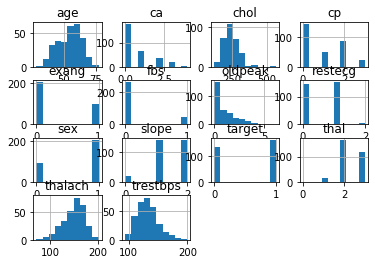

In [15]:
heart.hist()

Text(0.5, 1.0, 'Count of each Target Class')

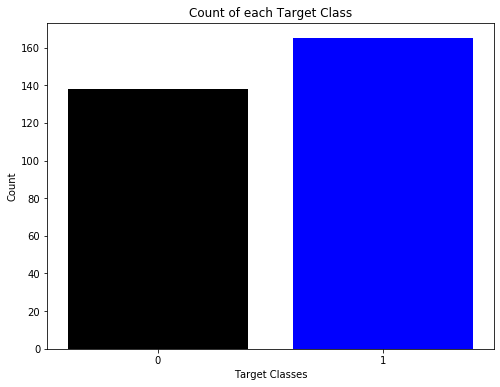

In [16]:
rcParams['figure.figsize'] = 8,6
plt.bar(heart['target'].unique(), heart['target'].value_counts(), color = ['blue', 'black'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

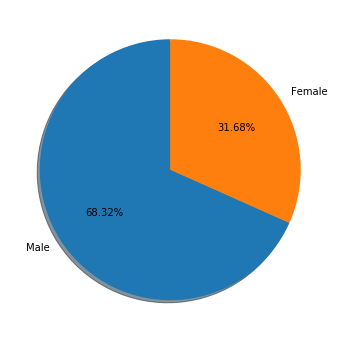

In [17]:
# Male vs Female data
male = len(heart[heart.sex == 1])
female = len(heart[heart.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

1    165
0    138
Name: target, dtype: int64


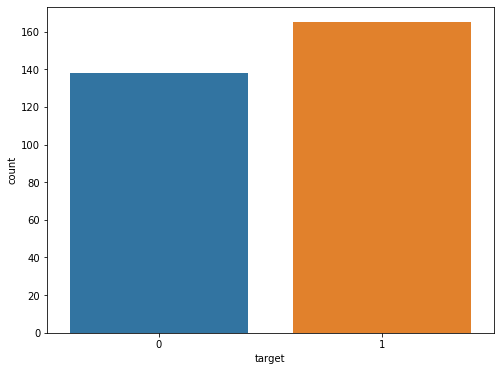

In [18]:
y = heart["target"]

sns.countplot(y)


target_temp = heart.target.value_counts()

print(target_temp)

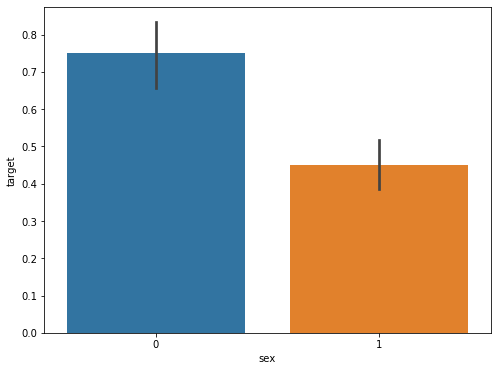

In [19]:
sns.barplot(heart["sex"],y)

In [20]:
heart["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

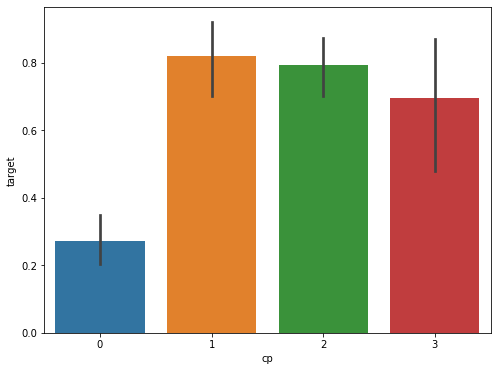

In [21]:

sns.barplot(heart["cp"],y)

In [22]:
heart["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [23]:

heart["fbs"].unique()

array([1, 0], dtype=int64)

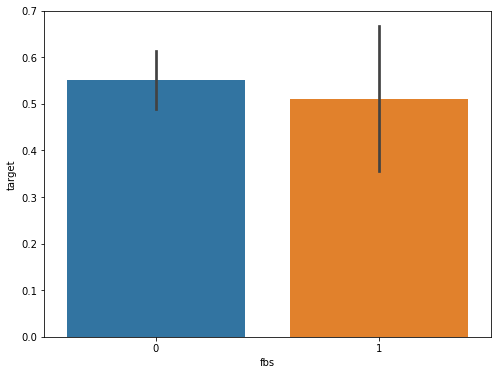

In [24]:

sns.barplot(heart["fbs"],y)

In [25]:
heart["restecg"].unique()

array([0, 1, 2], dtype=int64)

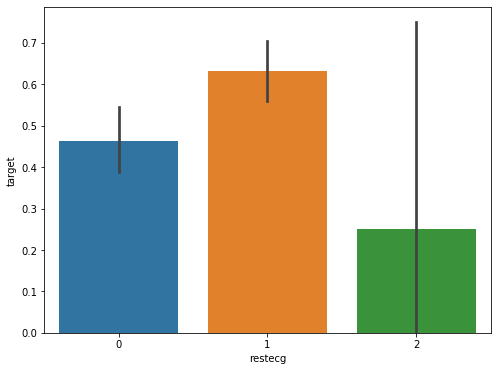

In [26]:
sns.barplot(heart["restecg"],y)

In [27]:
heart["exang"].unique()

array([0, 1], dtype=int64)

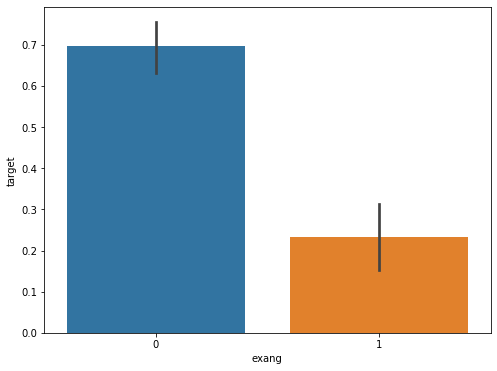

In [28]:
sns.barplot(heart["exang"],y)

In [29]:
heart["slope"].unique()

array([0, 2, 1], dtype=int64)

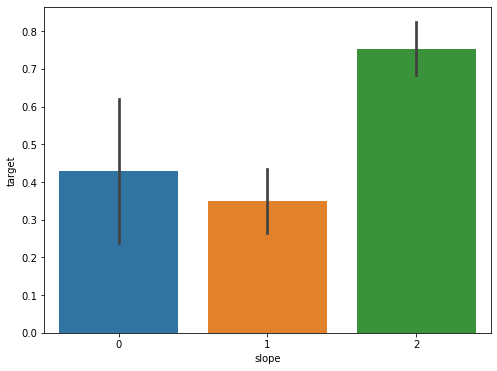

In [30]:
sns.barplot(heart["slope"],y)

In [31]:
heart["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

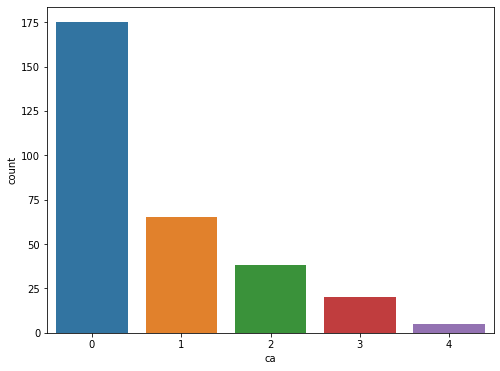

In [32]:
sns.countplot(heart["ca"])

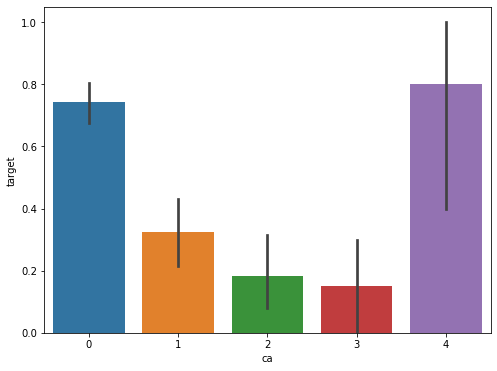

In [33]:
sns.barplot(heart["ca"],y)

In [34]:
heart["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

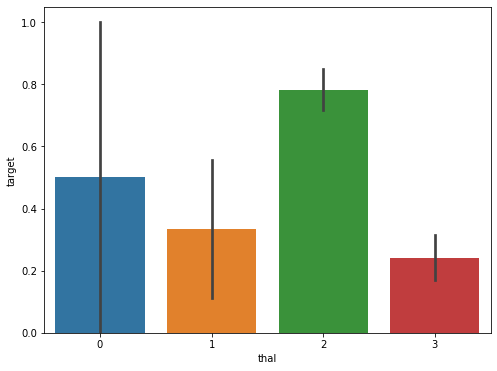

In [35]:
sns.barplot(heart["thal"],y)

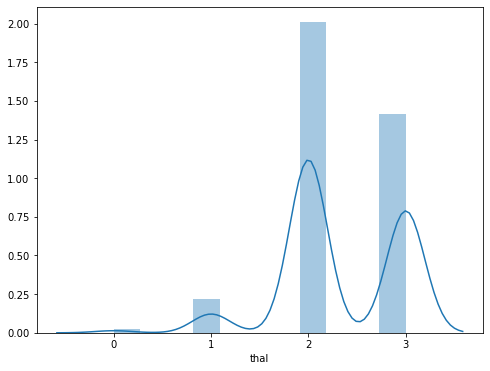

In [36]:
sns.distplot(heart["thal"])

In [37]:
from sklearn.model_selection import train_test_split

predictors = heart.drop("target",axis=1)
target = heart["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [38]:
X_train.shape

(242, 13)

In [39]:
X_test.shape

(61, 13)

In [40]:
Y_train.shape

(242,)

In [41]:
Y_test.shape

(61,)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Training Accuracy  84.71074380165288
Testing Accuracy  85.24590163934425


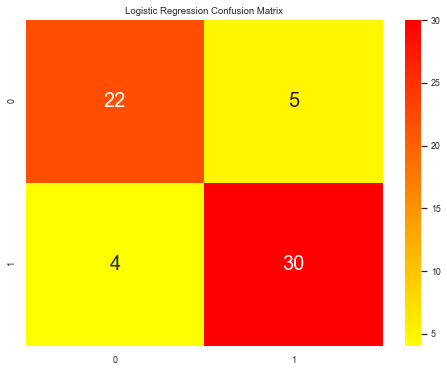

In [43]:
#Logistic regression
lr = LogisticRegression()

lr.fit(X_train,Y_train)
lr_acc=lr.score(X_test, Y_test)*100

print("Training Accuracy ", lr.score(X_train, Y_train)*100)
print("Testing Accuracy ",lr_acc )

Y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(Y_test,Y_pred_lr)

sns.set(font_scale=0.8)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="autumn_r",fmt="g",cbar=True, annot_kws={"size": 20})

In [44]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

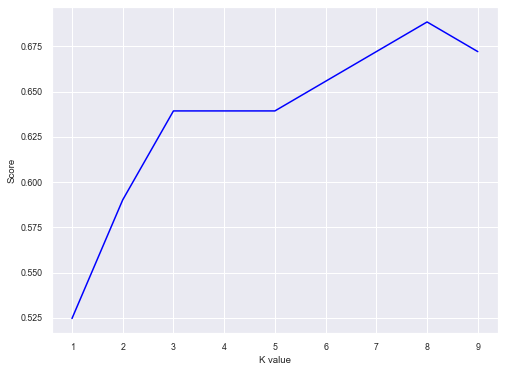

Maximum Accuracy is 68.85%


In [45]:
scoreList = []
for i in range(1,10):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(X_train, Y_train)
    scoreList.append(knn2.score(X_test, Y_test))
    
plt.plot(range(1,10), scoreList, color= "Blue")
plt.xticks(np.arange(1,10,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_acc = max(scoreList)*100
print("Maximum Accuracy is {:.2f}%".format(knn_acc))

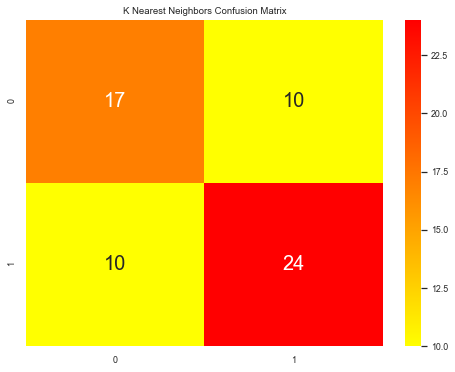

In [46]:
y_head_knn = knn.predict(X_test)
cm_knn = confusion_matrix(Y_test,y_head_knn)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="autumn_r",fmt="d",cbar=True, annot_kws={"size": 20})

In [47]:
#Support Vector Machine
svm_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svm_classifier = SVC(kernel = kernels[i])
    svm_classifier.fit(X_train, Y_train)
    svm_scores.append(svm_classifier.score(X_test, Y_test))

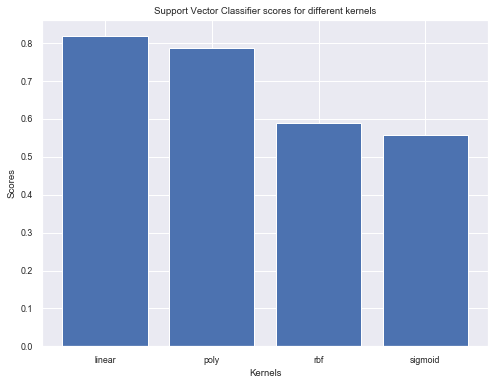

In [48]:
plt.bar(kernels, svm_scores)
colors = np.linspace(0, 1, len(kernels))

for i in range(len(kernels)):
    plt.xlabel('Kernels')
    plt.ylabel('Scores')
    plt.title('Support Vector Classifier scores for different kernels')

The Accuracy for Support Vector Classifier is 81.97% with poly kernel.


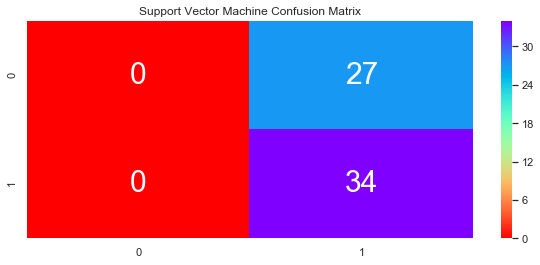

In [70]:
svm_acc=svm_scores[0]*100
print("The Accuracy for Support Vector Classifier is {:0.2f}% with {} kernel.".format(svm_acc, 'poly'))

y_head_svm = svm_classifier.predict(X_test)
cm_svm = confusion_matrix(Y_test,y_head_svm)

plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="",fmt="d",cbar=True,annot_kws={"size": 30})

In [60]:
#Random Forest Classification
max_accuracy = 0
for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

The accuracy for Random Forest is: 91.8 %


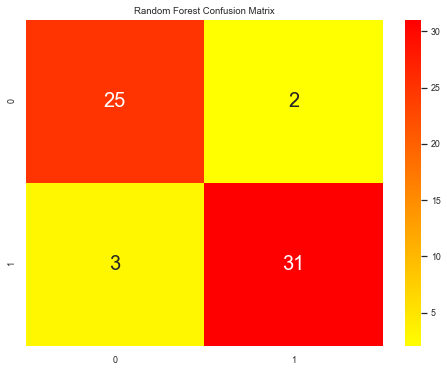

In [61]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy for Random Forest is: "+str(score_rf)+" %")

y_head_rf = rf.predict(X_test)
cm_rf = confusion_matrix(Y_test,y_head_rf)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="autumn_r",fmt="d",cbar=True, annot_kws={"size": 20})


In [59]:
scores = [lr_acc,knn_acc,svm_acc,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 85.24590163934425 %
The accuracy score achieved using K-Nearest Neighbors is: 68.85245901639344 %
The accuracy score achieved using Support Vector Machine is: 78.68852459016394 %
The accuracy score achieved using Random Forest is: 95.08 %


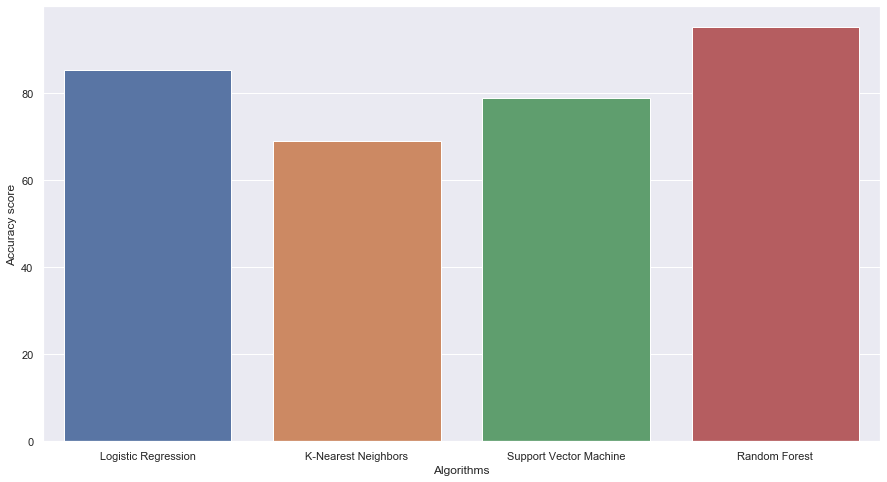

In [62]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC for SVM: 0.899782


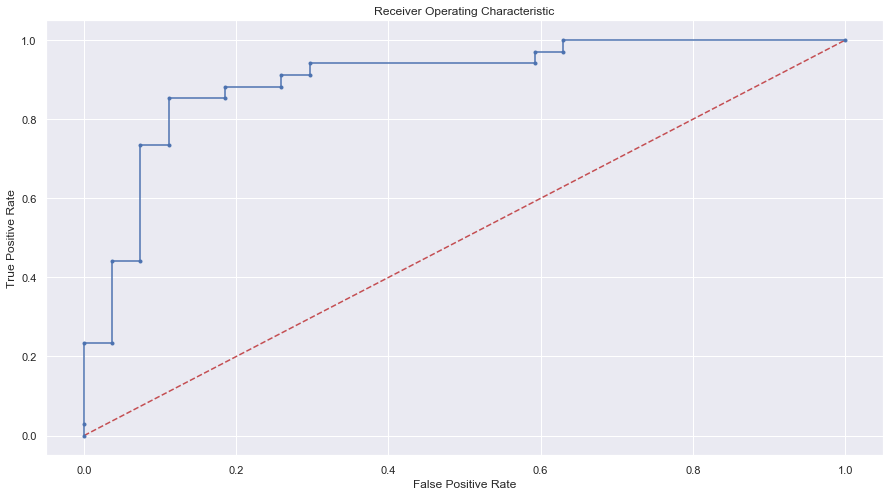

In [64]:
#AUC curve for SVM
classifier = SVC(kernel = 'linear', C = 1, random_state = 0, probability = True)
classif
ier.fit(X_train, Y_train)
p = classifier.predict_proba(X_test)
p = p[:, 1]

auc_svm = roc_auc_score(Y_test, p)
print('AUC for SVM: %f' % auc_svm)

fpr, tpr, thresholds = roc_curve(Y_test, p)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC for Random Forest Classifier: 0.861111


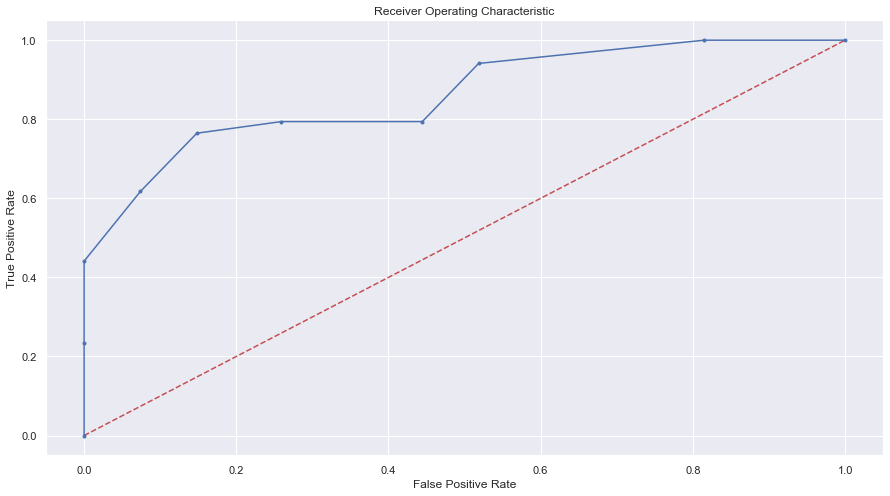

In [65]:
#AUC curve for RandomForestClassifier
RF = RandomForestClassifier(random_state=2)
RF.fit(X_train, Y_train)
probs = RF.predict_proba(X_test)

probs = probs[:, 1]

auc_randomforest = roc_auc_score(Y_test, probs)
print('AUC for Random Forest Classifier: %f' % auc_randomforest)

fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC for KNN: 0.690087


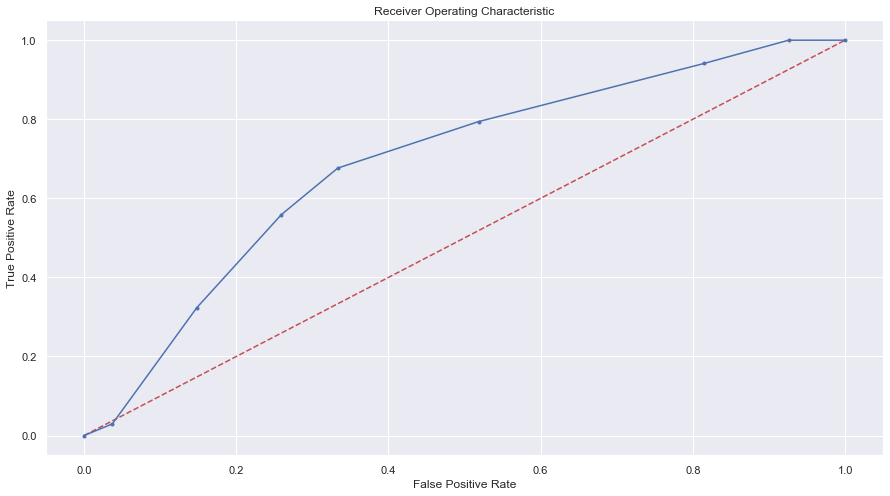

In [66]:
#AUC curve for KNN
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, Y_train)
pr = knn.predict_proba(X_test)
pr = pr[:, 1]

auc_knn = roc_auc_score(Y_test, pr)
print('AUC for KNN: %f' % auc_knn)

fpr, tpr, thresholds = roc_curve(Y_test, pr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC for Logistic Regression: 0.908


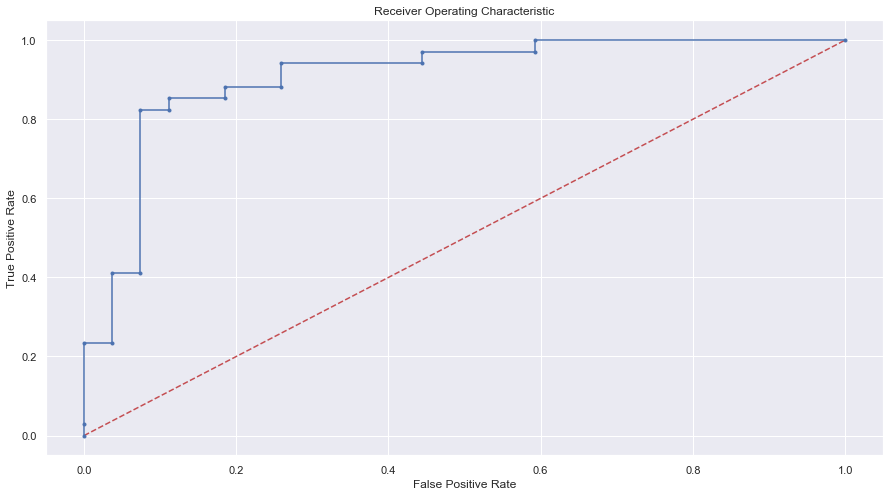

In [67]:
#AUC curve for LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, Y_train)
p = lr.predict_proba(X_test)
p = p[:, 1]

auc_lr = roc_auc_score(Y_test, p)
print('AUC for Logistic Regression: %.3f' % auc_lr)

fpr, tpr, thresholds = roc_curve(Y_test, p)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

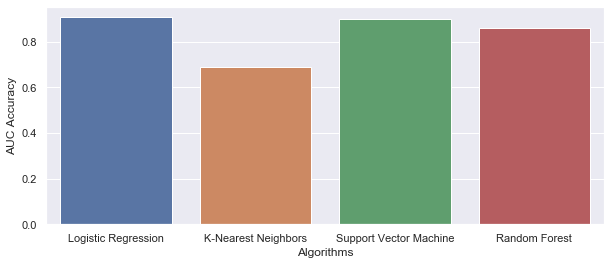

In [72]:
scores = [auc_lr,auc_knn,auc_svm,auc_randomforest]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine","Random Forest"]    
sns.set(rc={'figure.figsize':(10,4)})
plt.xlabel("Algorithms")
plt.ylabel("AUC Accuracy")

sns.barplot(algorithms,scores)